In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
x,y=make_blobs(centers=3,n_samples=1000,n_features=2)

In [11]:
x

array([[11.35633825,  6.60819469],
       [ 5.91469771, -5.45040272],
       [ 6.03483841, -6.42297835],
       ...,
       [ 8.76403357,  6.15031078],
       [-7.83779321, -7.38616436],
       [ 4.41655068, -5.70774757]])

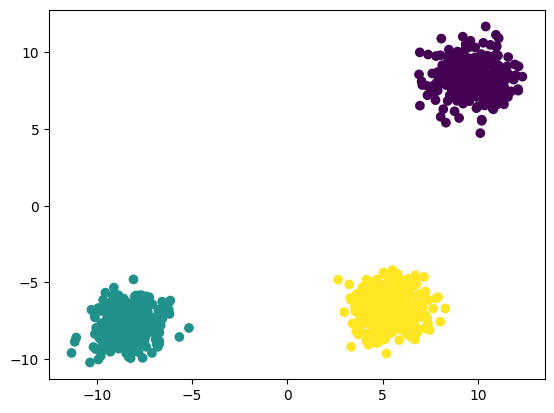

In [12]:
plt.scatter(x[:,0],x[:,1],c=y)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [17]:
from sklearn.cluster import KMeans

In [21]:
# ELBOW METHOD
wcss=[]
for k in range(1,12):
    Kmeans=KMeans(n_clusters=k,init="k-means++")
    Kmeans.fit(x_train_scaled)
    wcss.append(Kmeans.inertia_)

In [22]:
wcss

[1340.0,
 387.3956115118723,
 23.037255521638063,
 21.03930988110914,
 17.374062461766144,
 15.861362508680859,
 14.696845737473147,
 11.686884011576305,
 10.133443599034782,
 9.955072720011923,
 9.57720110915524]

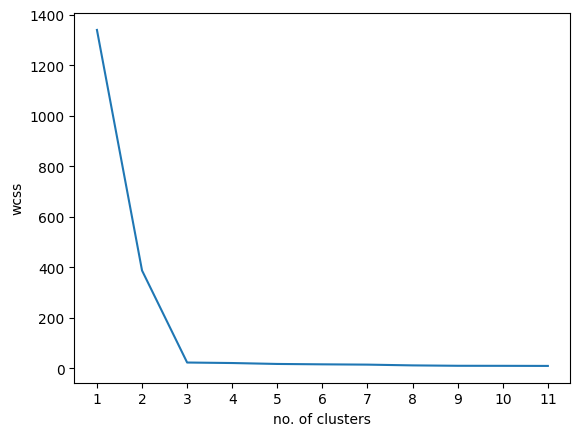

In [29]:
plt.plot(range(1,12),wcss)
plt.xticks(range(1,12))
plt.xlabel("no. of clusters")
plt.ylabel("wcss")
plt.show()

In [32]:
Kmeans=KMeans(n_clusters=3,init="k-means++")
Kmeans.fit_predict(x_train_scaled)

array([1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 1, 1,
       1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1,
       1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0,
       1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0,
       1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 2,
       1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1, 2, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0,
       2, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2,
       2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0,
       1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1,

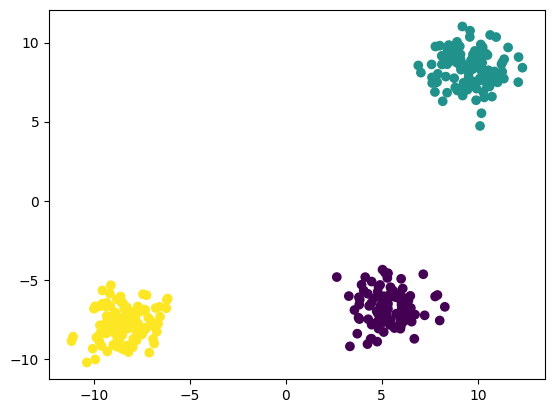

In [34]:
y_pred=Kmeans.predict(x_test_scaled)
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

In [36]:
#VALIDATION
# knee locator
!pip install kneed

In [40]:
from kneed import KneeLocator
kl=KneeLocator(range(1,12),wcss,curve="convex",direction="decreasing")

In [41]:
kl.elbow

np.int64(3)